In [1]:
import numpy as np
import pandas as pd

## Создание стобцов с количеством ответов

In [542]:
res_1 = pd.read_excel('first_DDI.xlsx')
res_1 = res_1[2:833]
res_1 = res_1.drop(['Unnamed: 0', '0.1', 32, 1], axis = 1)

In [543]:
gen = (np.hstack([np.zeros(2), np.load('general.npy'), np.load('general2.npy'), np.load('general3.npy')]))
res_1 = pd.concat([res_1, pd.Series(gen, name='cytochrome')], axis = 1)

In [544]:
CYP1A2 = np.hstack([np.zeros(2), np.load('CYP1A2_2.npy'), np.load('CYP1A2_670.npy')])
res_1 = pd.concat([res_1, pd.Series(CYP1A2, name='CYP1A2')], axis = 1)

In [545]:
a = np.load('CYP3A4.npy')
a[0] = 39
a[1] = 22

In [546]:
CYP3A4 = (np.hstack([np.zeros(2), np.load('CYP3A4_0.npy'), np.load('CYP3A4_300.npy'),
               np.load('CYP3A4_330.npy'), np.load('CYP3A4_740.npy'),
               np.load('CYP3A4_800.npy')]))
res_1 = pd.concat([res_1, pd.Series(CYP3A4, name='CYP3A4')], axis = 1)

In [547]:
#переименуем для красоты
res_1 = res_1.rename({0: 'drug'}, axis = 1)

In [548]:
CYP2C8 = np.hstack([np.zeros(2), np.load('CYP2C8.npy'), np.load('CYP2C8_170.npy'), np.load('CYP2C8_190.npy')])
res_1 = pd.concat([res_1, pd.Series(CYP2C8, name='CYP2C8')], axis = 1)

In [549]:
CYP2C9 = np.hstack([np.zeros(2), np.load('CYP2C9.npy'), np.load('CYP2C9_280.npy'), np.load('CYP2C9_540.npy')])
res_1 = pd.concat([res_1, pd.Series(CYP2C9, name='CYP2C9')], axis = 1)

In [550]:
res_1 = res_1[2:]
#res_1 = res_1.dropna()

In [556]:
#временная мера
#res_1 = res_1.fillna(-1)
res_1 = res_1.dropna()

In [552]:
drug_name = np.hstack([np.zeros(2), np.load('only_drugs.npy')])
res_1 = pd.concat([res_1, pd.Series(drug_name, name='count_name')], axis = 1)

In [553]:
res_1.dtypes

drug          object
cytochrome    object
CYP1A2        object
CYP3A4        object
CYP2C8        object
CYP2C9        object
count_name    object
dtype: object

### Преобразование всех ячеек в int64

In [557]:
for i in res_1.columns[1:]:
    res_1[i] = res_1[i].apply(lambda x: int(x.replace('\xa0', '').replace('’', '')) if type(x) == str else int(x))

In [558]:
res_1.dtypes

drug          object
cytochrome     int64
CYP1A2         int64
CYP3A4         int64
CYP2C8         int64
CYP2C9         int64
count_name     int64
dtype: object

In [559]:
table = pd.read_excel('DDI data availability.xlsx','DDI_yes', index_col=None, header=None)

In [560]:
table

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,NaN,NaN,Parrent drug,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Parrent drug without metabolites,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Drug,Relation,CYP,CYP3A4,CYP2C8,CYP2C9,CYP2C19,CYP1A2,CYP2A6,CYP2D6,...,CYP,CYP3A4,CYP2C8,CYP2C9,CYP2C19,CYP1A2,CYP2A6,CYP2D6,CYP2B6,CYP2E1
2,OPICAPONE,substrate,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,OZANIMOD,substrate,2,1,0,0,0,0,0,0,...,-,1,-,0,0,0,0,0,0,0
4,AMISULPRIDE,substrate,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,REMIMAZOLAM,substrate,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,ARTESUNATE,substrate,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,OSILODROSTAT,substrate,3,1,0,0,0,0,0,1,...,3,1,0,0,0,0,0,1,1,0
8,LURBINECTEDIN,substrate,1,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
9,TAZEMETOSTAT,substrate,2,1,0,0,0,0,0,0,...,2,1,0,0,0,0,0,0,0,0


In [561]:
c_table = table[[0, 2, 7, 3, 4, 5]][:833]
cor = pd.concat([c_table, res_1], axis = 1)
cor_clean = cor.replace(-1, np.nan).dropna()
cor_clean = cor_clean.drop(0, axis = 1)
cor_clean = cor_clean.rename({2: 'CYP_l', 7: 'CYP1A2_l', 3: 'CYP3A4_l', 4: 'CYP2C8_l', 5: 'CYP2C9_l'}, axis = 1)
cor_clean = cor_clean[['drug', 'CYP_l', 'CYP1A2_l', 'CYP3A4_l', 'CYP2C8_l', 'CYP2C9_l', 
       'cytochrome', 'CYP1A2', 'CYP3A4', 'CYP2C8', 'CYP2C9', 'count_name']]

In [563]:
cor_clean

,drug,CYP_l,CYP1A2_l,CYP3A4_l,CYP2C8_l,CYP2C9_l,cytochrome,CYP1A2,CYP3A4,CYP2C8,CYP2C9,count_name,CYP1A2_norm_cyt,CYP1A2_norm_name,CYP3A4_norm_cyt,CYP3A4_norm_name,CYP2C8_norm_cyt,CYP2C8_norm_name,CYP2C9_norm_cyt,CYP2C9_norm_name
2,OPICAPONE,0,0,0,0,0,60.0,20.0,39.0,19.0,16.0,1170.0,0.333333,0.017094,0.650000,0.033333,0.316667,0.016239,0.266667,0.013675
3,OZANIMOD,2,0,1,0,0,51.0,4.0,22.0,8.0,9.0,1740.0,0.078431,0.002299,0.431373,0.012644,0.156863,0.004598,0.176471,0.005172
4,AMISULPRIDE,0,0,0,0,0,1450.0,332.0,541.0,80.0,942.0,19900.0,0.228966,0.016683,0.373103,0.027186,0.055172,0.004020,0.649655,0.047337
5,REMIMAZOLAM,0,0,0,0,0,29.0,5.0,16.0,3.0,7.0,420.0,0.172414,0.011905,0.551724,0.038095,0.103448,0.007143,0.241379,0.016667
6,ARTESUNATE,0,0,0,0,0,4830.0,1070.0,1640.0,1050.0,1730.0,41600.0,0.221532,0.025721,0.339545,0.039423,0.217391,0.025240,0.358178,0.041587
7,OSILODROSTAT,3,0,1,0,0,51.0,18.0,32.0,8.0,19.0,254.0,0.352941,0.070866,0.627451,0.125984,0.156863,0.031496,0.372549,0.074803
8,LURBINECTEDIN,1,0,1,0,0,62.0,3.0,25.0,5.0,8.0,1270.0,0.048387,0.002362,0.403226,0.019685,0.080645,0.003937,0.129032,0.006299
9,TAZEMETOSTAT,2,0,1,0,0,47.0,5.0,28.0,5.0,7.0,1830.0,0.106383,0.002732,0.595745,0.015301,0.106383,0.002732,0.148936,0.003825
10,TRIHEPTANOIN,0,0,0,0,0,153.0,1.0,12.0,2.0,4.0,1170.0,0.006536,0.000855,0.078431,0.010256,0.013072,0.001709,0.026144,0.003419
11,CEDAZURIDINE,0,0,0,0,0,4.0,1.0,2.0,1.0,1.0,311.0,0.250000,0.003215,0.500000,0.006431,0.250000,0.003215,0.250000,0.003215


## Model

In [4]:
cor_clean = pd.read_excel('drug_yes.xlsx', index_col = 0)

In [94]:
cor_clean = pd.read_csv('cor_clean_pubmed.csv', index_col = 0, sep=',')

In [95]:
drug_name = np.hstack([np.zeros(2), np.load('only_drugs.npy')])
res_1 = pd.concat([cor_clean, pd.Series(drug_name, name='count_name')], axis = 1)

In [96]:
res_1['count_name'] = res_1['count_name'].apply(lambda x: float(x.replace('’', '').replace('\xa0', '')))


In [6]:
#norm
cor_clean = cor_clean.replace(np.nan, 0)

In [97]:
res_1 = res_1.dropna()
cor_clean=res_1

In [103]:
for i in ['CYP1A2', 'CYP3A4', 'CYP2C8', 'CYP2C9']:
    cor_clean[i+'_norm_cyt'] = cor_clean[i]/cor_clean['cytochrome']
    cor_clean[i+'_norm_name'] = cor_clean[i]/cor_clean['count_name']
    cor_clean[i+'_norm_pubmed'] = cor_clean[i]/cor_clean['count_pubmed']

In [32]:
cor_clean.columns

Index(['drug', 'CYP_l', 'CYP1A2_l', 'CYP3A4_l', 'CYP2C8_l', 'CYP2C9_l',
       'cytochrome', 'CYP1A2', 'CYP3A4', 'CYP2C8', 'CYP2C9', 'year',
       'count_pubmed', 'CYP1A2_norm_cyt', 'count_name', 'CYP1A2_norm_name',
       'CYP3A4_norm_cyt', 'CYP3A4_norm_name', 'CYP2C8_norm_cyt',
       'CYP2C8_norm_name', 'CYP2C9_norm_cyt', 'CYP2C9_norm_name',
       'CYP1A2_norm_pubmed', 'CYP3A4_norm_pubmed', 'CYP2C8_norm_pubmed',
       'CYP2C9_norm_pubmed'],
      dtype='object')

In [38]:
cor_clean

,drug,CYP_l,CYP1A2_l,CYP3A4_l,CYP2C8_l,CYP2C9_l,cytochrome,CYP1A2,CYP3A4,CYP2C8,...,CYP3A4_norm_cyt,CYP3A4_norm_name,CYP2C8_norm_cyt,CYP2C8_norm_name,CYP2C9_norm_cyt,CYP2C9_norm_name,CYP1A2_norm_pubmed,CYP3A4_norm_pubmed,CYP2C8_norm_pubmed,CYP2C9_norm_pubmed
2,OPICAPONE,0.0,0.0,0.0,0.0,0.0,60.0,20.0,39.0,19.0,...,0.650000,0.033333,0.316667,0.016239,0.266667,0.013675,0.303030,0.590909,0.287879,0.242424
3,OZANIMOD,2.0,0.0,1.0,0.0,0.0,51.0,4.0,22.0,8.0,...,0.431373,0.012644,0.156863,0.004598,0.176471,0.005172,0.045455,0.250000,0.090909,0.102273
4,AMISULPRIDE,0.0,0.0,0.0,0.0,0.0,1450.0,332.0,541.0,80.0,...,0.373103,0.027186,0.055172,0.004020,0.649655,0.047337,0.285223,0.464777,0.068729,0.809278
5,REMIMAZOLAM,0.0,0.0,0.0,0.0,0.0,29.0,5.0,16.0,3.0,...,0.551724,0.038095,0.103448,0.007143,0.241379,0.016667,0.067568,0.216216,0.040541,0.094595
6,ARTESUNATE,0.0,0.0,0.0,0.0,0.0,4830.0,1070.0,1640.0,1050.0,...,0.339545,0.039423,0.217391,0.025240,0.358178,0.041587,0.346278,0.530744,0.339806,0.559871
7,OSILODROSTAT,3.0,0.0,1.0,0.0,0.0,51.0,18.0,32.0,8.0,...,0.627451,0.125984,0.156863,0.031496,0.372549,0.074803,0.450000,0.800000,0.200000,0.475000
8,LURBINECTEDIN,1.0,0.0,1.0,0.0,0.0,62.0,3.0,25.0,5.0,...,0.403226,0.019685,0.080645,0.003937,0.129032,0.006299,0.049180,0.409836,0.081967,0.131148
9,TAZEMETOSTAT,2.0,0.0,1.0,0.0,0.0,47.0,5.0,28.0,5.0,...,0.595745,0.015301,0.106383,0.002732,0.148936,0.003825,0.054945,0.307692,0.054945,0.076923
10,TRIHEPTANOIN,0.0,0.0,0.0,0.0,0.0,153.0,1.0,12.0,2.0,...,0.078431,0.010256,0.013072,0.001709,0.026144,0.003419,0.010526,0.126316,0.021053,0.042105
11,CEDAZURIDINE,0.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,1.0,...,0.500000,0.006431,0.250000,0.003215,0.250000,0.003215,0.090909,0.181818,0.090909,0.090909


In [63]:
X = cor_clean_all.dropna()[[#'cytochrome', 
                            #'CYP1A2', 'CYP3A4', 'CYP2C8', 'CYP2C9', 
        'year',
        #'count_pubmed',
        #'count_name', 
        'CYP1A2_norm_cyt', 'CYP1A2_norm_name', 'CYP1A2_norm_pubmed',
        'CYP3A4_norm_cyt', 'CYP3A4_norm_name', 'CYP3A4_norm_pubmed', 
        'CYP2C8_norm_cyt', 'CYP2C8_norm_name', 'CYP2C8_norm_pubmed', 
        'CYP2C9_norm_cyt', 'CYP2C9_norm_name', 'CYP2C9_norm_pubmed'
                           ]].replace(np.inf, 0)
    
y = (cor_clean_all.dropna()['CYP3A4' + '_l'] > 0).astype(int).replace(0, -1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X.dropna(0), y, \
                                                     test_size=0.35,\
                                                     shuffle=True,
                                                     random_state=2021)

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, mean_squared_error, confusion_matrix
rfc = RandomForestClassifier(max_depth=11, random_state=2012)
rfc.fit(X_train, y_train)
print(accuracy_score(rfc.predict(X_test), y_test), roc_auc_score(rfc.predict(X_test), y_test))


0.7243816254416962 0.6972171636694742


C:\Users\grish\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [40]:
from sklearn.tree import DecisionTreeClassifier
for i in range(1, 20, 1):
    for j in range(1, 200, 10):
        rfc = DecisionTreeClassifier(max_depth=i, 
                                 random_state=42,
                                min_samples_split=2,
                                min_samples_leaf=j,
                                    class_weight='balanced')
        rfc.fit(X_train, y_train)
        print(accuracy_score(rfc.predict(X_test), y_test),roc_auc_score(rfc.predict(X_test), y_test), i, j)

0.5965346534653465 0.6748273431994363 1 1
0.5965346534653465 0.6748273431994363 1 11
0.5965346534653465 0.6748273431994363 1 21
0.5965346534653465 0.6748273431994363 1 31
0.5965346534653465 0.6748273431994363 1 41
0.5965346534653465 0.6748273431994363 1 51
0.5965346534653465 0.6748273431994363 1 61
0.5965346534653465 0.6748273431994363 1 71
0.5965346534653465 0.6748273431994363 1 81
0.5965346534653465 0.6748273431994363 1 91
0.5965346534653465 0.6748273431994363 1 101
0.5965346534653465 0.6748273431994363 1 111
0.5965346534653465 0.6748273431994363 1 121
0.5965346534653465 0.6748273431994363 1 131
0.5965346534653465 0.6748273431994363 1 141
0.6806930693069307 0.7048658764815969 1 151
0.6806930693069307 0.7048658764815969 1 161
0.6806930693069307 0.7048658764815969 1 171
0.6806930693069307 0.7048658764815969 1 181
0.6806930693069307 0.7048658764815969 1 191
0.6361386138613861 0.6483525961704331 2 1
0.6361386138613861 0.6483525961704331 2 11
0.6361386138613861 0.6483525961704331 2 21
0.6

0.5965346534653465 0.6748273431994363 11 101
0.5965346534653465 0.6748273431994363 11 111
0.5965346534653465 0.6748273431994363 11 121
0.5965346534653465 0.6748273431994363 11 131
0.5965346534653465 0.6748273431994363 11 141
0.6806930693069307 0.7048658764815969 11 151
0.6806930693069307 0.7048658764815969 11 161
0.6806930693069307 0.7048658764815969 11 171
0.6806930693069307 0.7048658764815969 11 181
0.6806930693069307 0.7048658764815969 11 191
0.6460396039603961 0.616647234097681 12 1
0.6212871287128713 0.6175605090855587 12 11
0.6336633663366337 0.6662954338361851 12 21
0.6905940594059405 0.7068590361743687 12 31
0.6856435643564357 0.6513974941484236 12 41
0.6856435643564357 0.6513974941484236 12 51
0.6856435643564357 0.6513974941484236 12 61
0.7029702970297029 0.7045098039215687 12 71
0.5965346534653465 0.6748273431994363 12 81
0.5965346534653465 0.6748273431994363 12 91
0.5965346534653465 0.6748273431994363 12 101
0.5965346534653465 0.6748273431994363 12 111
0.5965346534653465 0.6

In [316]:
rfc = DecisionTreeClassifier(max_depth=9, 
                                     random_state=42,
                                    min_samples_leaf=17)
rfc.fit(X_train, y_train)
print(round(accuracy_score(rfc.predict(X_test), y_test), 4),
      round(f1_score(rfc.predict(X_test), y_test), 4),
      round(roc_auc_score(rfc.predict(X_test), y_test), 4))


0.7195 0.5036 0.6681


In [345]:
rfc.

-1    314
 1    178
Name: CYP3A4_l, dtype: int64

## Linreg

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, mean_squared_error, confusion_matrix, roc_auc_score 

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
cor_clean.to_csv('cor_clean_24_04.csv')

In [4]:
cor_clean=pd.read_csv('cor_clean_24_04.csv', index_col=0)

In [10]:
df = pd.read_csv('cor_clean_pubmed.csv', index_col=0)

In [8]:
#cor_clean = cor_clean[cor_clean['CYP_l'] != 0]
pm = np.load('only_drugs.npy')
cor_clean['pubmed_count_full'] = pm

cor_clean['pubmed_count_full'] = cor_clean['pubmed_count_full'].apply(lambda x: float(x.replace('’', '').replace('\xa0', '')))

#cor_clean_all = cor_clean[cor_clean['count_pubmed'] != 0]
cor_clean_all = cor_clean[cor_clean['cytochrome'] != 0]

In [178]:
cor_clean_all['year'] = cor_clean_all['year'] - 1900

In [7]:
X = cor_clean_all[['CYP1A2_norm_name', 
       'CYP3A4_norm_cyt', 'CYP3A4_norm_name', 'CYP2C8_norm_cyt',
       'CYP2C8_norm_name', 'CYP2C9_norm_cyt', 'CYP2C9_norm_name',
       'count_pubmed', 'pubmed_count_full']].replace(np.inf, 0)
y = (cor_clean_all['CYP3A4_l'] > 0).astype(int).replace(0, -1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, \
                                                     test_size=0.15,\
                                                     shuffle=True,
                                                     random_state=2021)

In [52]:
X.dtypes

CYP3A4               float64
CYP_l                float64
year                 float64
count_pubmed         float64
pubmed_count_full    float64
dtype: object

In [8]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
count = []
for i in ['CYP1A2_l', 'CYP3A4_l', 'CYP2C8_l', 'CYP2C9_l']:
    count.append((cor_clean[i] > 0).sum())

In [271]:
acc_u_ = []
f1_u_ = []
ran = np.arange(0.01, 1, 0.01)
for i in ran:
    lr = LogisticRegression(class_weight='balanced', random_state=2021,
                                penalty='elasticnet',
                                l1_ratio=0.01,
                                solver='saga',
                               max_iter=500, C = i)

    lr.fit(X_train, y_train)
    f1_u_.append(f1_score(y_test, lr.predict(X_test)))
    acc_u_.append(accuracy_score(y_test, lr.predict(X_test)))

C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


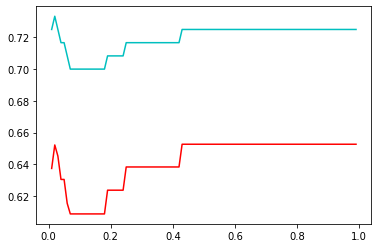

In [272]:
plt.plot(ran, f1_u_, 'r', ran, acc_u_, 'c')

In [14]:
cor_clean_all[['count_pubmed', 'count_name', 'pubmed_count_full']]

,count_pubmed,count_name,pubmed_count_full
2,66.0,1170.0,1170.0
3,88.0,1740.0,1740.0
4,1164.0,19900.0,19900.0
5,74.0,420.0,420.0
6,3090.0,41600.0,41600.0
7,40.0,254.0,254.0
8,61.0,1270.0,1270.0
9,91.0,1830.0,1830.0
10,95.0,1170.0,1170.0
11,11.0,311.0,311.0


In [96]:
X = cor_clean_all.dropna()[[#'cytochrome', 
                            #'CYP1A2', 'CYP3A4', 'CYP2C8', 'CYP2C9', 
        'year',
        #'count_pubmed',
        #'count_name', 
        'CYP1A2_norm_cyt', 'CYP1A2_norm_name', 'CYP1A2_norm_pubmed',
        'CYP3A4_norm_cyt', 'CYP3A4_norm_name', 'CYP3A4_norm_pubmed', 
        'CYP2C8_norm_cyt', 'CYP2C8_norm_name', 'CYP2C8_norm_pubmed', 
        'CYP2C9_norm_cyt', 'CYP2C9_norm_name', 'CYP2C9_norm_pubmed'
                           ]].replace(np.inf, -1)
    
y = (cor_clean_all.dropna()['CYP3A4' + '_l'] > 0).astype(int).replace(0, -1)
    
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, \
                                                         test_size=0.3,\
                                                         shuffle=True,
                                                         random_state=202)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
scores_lr=[]
ran=np.arange(0.01, 1, 0.01)
for c in ran:
    lr = LogisticRegression(class_weight='balanced',
    random_state=202,
                                #penalty='elacticnet',
                                #l2_ratio=0.001,
                                #solver='newton-cg',
                               max_iter=200, C = c)
    cv_lr = cross_validate(lr, X_train, y_train, cv = 3, scoring = 'roc_auc')['test_score']
    
    scores_lr.append(cv_lr.mean())

lr = LogisticRegression(class_weight='balanced',
    random_state=202,
                                #penalty='elasticnet',
                                #l1_ratio=0.001,
                                #solver='newton-cg',
                               max_iter=200, C = ran[scores_lr.index(max(scores_lr))])
lr.fit(X_train, y_train)
print(confusion_matrix(y_test, lr.predict(X_test)))
print(f1_score(y_test, lr.predict(X_test)))
print(accuracy_score(y_test, lr.predict(X_test)))
print(roc_auc_score(y_test, lr.predict(X_test)))
print(roc_auc_score(y_train, lr.predict(X_train)))

C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[[108  41]
 [ 29  65]]
0.65
0.7119341563786008
0.7081607882336142
0.7197640950392235


C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [66]:
roc_auc_score(y_test, lr.predict(X_test))

0.7220663861617578

In [24]:
x = scaler.transform(X)

In [26]:
confusion_matrix(y, lr.predict(x))

array([[466,  65],
       [ 63, 221]], dtype=int64)

In [49]:
lr.coef_

array([[-0.06365197,  2.11563897, -0.01180612,  0.01434798, -0.10000633]])

In [ ]:
задачи 
полуавтоматическую
контроль качества


проверка концепции: нарисовать что делали
    план проекта
    на выходе наборы значений для проверка
    
4. Есть мишень SST4 
узнать где экспрессируется  (головнй мозг)
мишень -> заболевания, токсичность
соединение -> мишень


In [33]:
conf = pd.DataFrame({'true': y, 'pred': lr.predict(x)})
conf = conf[conf['true'] == 1]
conf = conf[conf['pred'] == -1]

In [48]:
cor_clean_all.loc[conf.index][['drug', 'CYP3A4', 'year',
       'count_pubmed', 'pubmed_count_full']].to_excel('mistake_CYP3A4.xlsx')

In [44]:
cor_clean_all[['CYP3A4', 'CYP_l', 'year',
       'count_pubmed', 'pubmed_count_full']].describe()

,CYP3A4,CYP_l,year,count_pubmed,pubmed_count_full
count,815.000000,815.000000,815.000000,815.000000,8.150000e+02
mean,1222.997546,1.377914,1939.942331,3390.395092,4.796007e+04
std,2651.273286,1.931124,283.908527,19232.786855,1.764861e+05
min,0.000000,0.000000,0.000000,0.000000,1.000000e+00
25%,61.000000,0.000000,1968.000000,151.000000,2.410000e+03
50%,273.000000,0.000000,1979.000000,621.000000,9.260000e+03
75%,1110.000000,2.000000,1996.000000,2155.000000,2.940000e+04
max,21500.000000,12.000000,2019.000000,515229.000000,2.420000e+06


In [300]:
thr = []
for i in lr.predict_proba(X_test):
    if i[1] > 0.5:
        if i[0] < 0.5:
            thr.append(1)
        else:
            thr.append(-1)
    else:
        thr.append(-1)

In [423]:
cyp

'CYP2C9'

In [431]:
X = cor_clean_all[[cyp, 'CYP_l', 'year',
       'count_pubmed', 'pubmed_count_full']].replace(np.inf, 0)
    
y = (cor_clean_all[cyp + '_l'] > 0).astype(int).replace(0, -1)
    
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, \
                                                         test_size=0.5,\
                                                         shuffle=True,
                                                         random_state=21)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
lr.fit(X_train, y_train)
confusion_matrix(y_test, lr.predict(X_test))

array([[310,  46],
       [  8,  44]], dtype=int64)

In [441]:
cor_clean_all.to_csv('cor_clean_all_v1.csv')

In [439]:
trash[trash['y'] == 1]['predict']

KeyError: 0

In [437]:
trash = pd.DataFrame({'y' : y_test, 'predict': lr.predict(X_test)})
cor_clean_all.loc[(trash[trash['y'] == 1]['predict'] == -1).nonzero()][['drug', cyp, 'CYP_l', 'year',
       'count_pubmed', 'pubmed_count_full', 'CYP2C9_l']]

C:\Users\grish\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  
C:\Users\grish\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,drug,CYP2C9,CYP_l,year,count_pubmed,pubmed_count_full,CYP2C9_l
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,LUMATEPERONE,4.0,3.0,2016.0,22.0,263.0,0.0
20,ALPELISIB,26.0,1.0,2013.0,199.0,2860.0,0.0
22,RELEBACTAM,10.0,0.0,2006.0,167.0,2170.0,0.0
38,LUSUTROMBOPAG,12.0,6.0,2012.0,52.0,338.0,1.0
45,OZENOXACIN,5.0,0.0,2006.0,43.0,296.0,0.0
47,MIDOSTAURIN,66.0,1.0,1989.0,572.0,6360.0,0.0
48,COPANLISIB,15.0,3.0,2006.0,98.0,2130.0,0.0


In [12]:
max_f1 =[]
max_acc = []
best_coef = []
C_best = []
max_roc_auc=[]
for cyp in ['CYP1A2', 'CYP3A4', 'CYP2C8', 'CYP2C9']:
    X = cor_clean_all[[cyp, #'CYP_l',
                       'year',
       'count_pubmed', 'pubmed_count_full']].replace(np.inf, 0)
    
    y = (cor_clean_all[cyp + '_l'] > 0).astype(int).replace(0, -1)
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test  = train_test_split(X, y, \
                                                         test_size=0.3,\
                                                         shuffle=True,
                                                         random_state=2021)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    scores_lr=[]
    ran = np.arange(0.01, 1, 0.01)
    for c in ran:
        lr = LogisticRegression(class_weight='balanced',
        random_state=202,
                                    #penalty='elasticnet',
                                    #l1_ratio=0.001,
                                    solver='liblinear',
                                   max_iter=100, C = c)
        
        cv_lr = cross_validate(lr, X_train, y_train, cv = 3, scoring = 'roc_auc')['test_score']
        scores_lr.append(cv_lr.mean())

    lr = LogisticRegression(class_weight='balanced',
        random_state=202,
                                    solver='liblinear',
                                   max_iter=100, C = ran[scores_lr.index(max(scores_lr))])

    lr.fit(X_train, y_train)
    max_f1.append(f1_score(y_test, lr.predict(X_test)))
    max_acc.append(accuracy_score(y_test, lr.predict(X_test)))
    best_coef.append(lr.coef_)
    C_best.append(ran[scores_lr.index(max(scores_lr))])
    max_roc_auc.append(roc_auc_score(y_test, lr.predict(X_test)))
    print(confusion_matrix(y_test, lr.predict(X_test)))    

[[187  33]
 [ 19   6]]
[[132  27]
 [ 56  30]]
[[197  35]
 [  9   4]]
[[189  30]
 [ 14  12]]


In [13]:
d = {'cyp' : ['CYP1A2_l', 'CYP3A4_l', 'CYP2C8_l', 'CYP2C9_l'], 'count_yes':count, 'roc_auc':max_roc_auc,
     'f1_score' : max_f1,'acc_score' : max_acc, 'coef':best_coef, 'C':C_best}
total_pm_big = pd.DataFrame(data=d)
total_pm_big

,cyp,count_yes,roc_auc,f1_score,acc_score,coef,C
0,CYP1A2_l,96,0.545000,0.187500,0.787755,"[[0.4730372750165954, 0.05798000138231706, -0....",0.49
1,CYP3A4_l,285,0.589513,0.419580,0.661224,"[[0.2569599456354913, 0.052939163485025, -0.11...",0.69
2,CYP2C8_l,63,0.578415,0.153846,0.820408,"[[0.46022457680911644, 0.044180767534170065, -...",0.42
3,CYP2C9_l,107,0.662276,0.352941,0.820408,"[[0.26567150691910785, 0.05207125902226484, -0...",0.01


In [61]:
y_test.sum()

-193

In [58]:
total_pm_big.to_excel('total_pm_27.xlsx')

In [393]:
d = {'cyp' : ['CYP1A2_l', 'CYP3A4_l', 'CYP2C8_l', 'CYP2C9_l'], 'count_yes':count, 'roc_auc':max_roc_auc,
     'f1_score' : max_f1,'acc_score' : max_acc, 'coef':best_coef, 'C':C_best}
total_pm_bigC = pd.DataFrame(data=d)
total_pm_bigC

,cyp,count_yes,roc_auc,f1_score,acc_score,coef,C
0,CYP1A2_l,96,0.737500,0.480000,0.841463,"[[0.14487207658954732, 1.3249453265579492, -0....",2.011
1,CYP3A4_l,285,0.800926,0.736842,0.817073,"[[0.05655743661694091, 1.969714895632449, 0.04...",2.011
2,CYP2C8_l,63,0.798077,0.315789,0.841463,"[[0.15814498345865224, 1.939619670473054, 0.17...",2.011
3,CYP2C9_l,107,0.773611,0.500000,0.829268,"[[0.42877495579617214, 1.4650933791336846, 0.0...",2.011


In [307]:
total_pm_bigC.to_excel('total_pm_bigC.xlsx')

## SVM

C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: Undefined

C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: Undefined

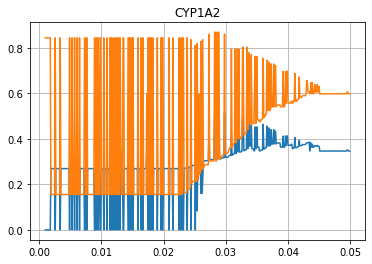

C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: Undefined

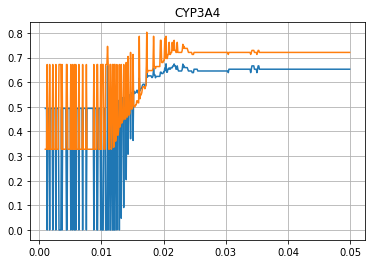

C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: Undefined

C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: Undefined

C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: Undefined

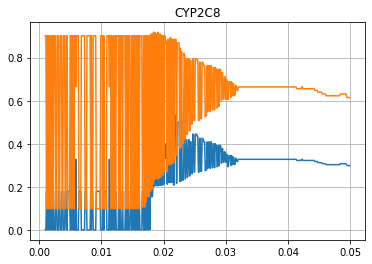

C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: Undefined

C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: Undefined

C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: Undefined

C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: Undefined

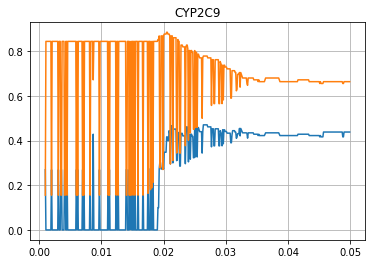

In [87]:
max_f1 =[]
max_acc = []
best_coef = []
C_best = []
max_roc_auc=[]
for cyp in ['CYP1A2', 'CYP3A4', 'CYP2C8', 'CYP2C9']:
    X = cor_clean_all.dropna()[[#'cytochrome', 
                            #'CYP1A2', 'CYP3A4', 'CYP2C8', 'CYP2C9', 
        'year',
        #'count_pubmed',
        #'count_name', 
        'CYP1A2_norm_cyt', 'CYP1A2_norm_name', 'CYP1A2_norm_pubmed',
        'CYP3A4_norm_cyt', 'CYP3A4_norm_name', 'CYP3A4_norm_pubmed', 
        'CYP2C8_norm_cyt', 'CYP2C8_norm_name', 'CYP2C8_norm_pubmed', 
        'CYP2C9_norm_cyt', 'CYP2C9_norm_name', 'CYP2C9_norm_pubmed'
                           ]].replace(np.inf, -1)
    
    y = (cor_clean_all.dropna()[cyp + '_l'] > 0).astype(int).replace(0, -1)
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test  = train_test_split(X, y, \
                                                         test_size=0.15,\
                                                         shuffle=True,
                                                         random_state=20)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    f1 =[]
    acc=[]
    coef=[]
    C = []
    roc_auc=[]
    ran = np.arange(0.001, 0.05, 0.0001)
    for i in ran:
        svm = SVC(
            class_weight='balanced',
            random_state=2021,
            C = i)

        svm.fit(X_train, y_train)
        f1.append(f1_score(y_test, svm.predict(X_test)))
        acc.append(accuracy_score(y_test, svm.predict(X_test)))
        #coef.append(svm.coef_)
        C.append(i)
        roc_auc.append(roc_auc_score(y_test, svm.predict(X_test)))
    plt.plot(ran, f1, ran, acc)
    max_roc_auc.append(round(roc_auc[acc.index(max(acc))], 3))
    max_f1.append(round(f1[acc.index(max(acc))], 3))
    max_acc.append(round((max(acc)), 3))
    #best_coef.append(coef[acc.index(max(acc))])
    C_best.append(C[acc.index(max(acc))])
    plt.title(f'{cyp}')
    plt.grid()
    plt.show()
    

In [81]:
from sklearn.model_selection import cross_validate


X = cor_clean_all.dropna()[['year',
                       #'CYP1A2_norm_name', 
       'CYP3A4_norm_cyt', 'CYP3A4_norm_name', #'CYP2C8_norm_cyt',
       #'CYP2C8_norm_name', 'CYP2C9_norm_cyt', 'CYP2C9_norm_name',
       #'CYP1A2_norm_pubmed', 
                   'CYP3A4_norm_pubmed',
                   #'CYP2C8_norm_pubmed',
       #'CYP2C9_norm_pubmed'
                  ]].replace(np.inf, 0)
y = (cor_clean_all.dropna()['CYP3A4_l'] > 0).astype(int).replace(0, -1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, \
                                                         test_size=0.15,\
                                                         shuffle=True,
                                                         random_state=20)
    
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

scores_lr = []
scores_svm = []

for c in np.arange(0.1, 1, 0.01):
    #lr = LogisticRegression(C = c)
    svm = SVC(C = c, kernel = 'linear')
    
    #cv_lr = cross_validate(lr, X_train, y_train, cv = 5, scoring = 'f1')['test_score']
    cv_svm = cross_validate(svm, X_train, y_train, cv = 5, scoring = 'f1')['test_score']
    
    #scores_lr.append(cv_lr.mean())
    scores_svm.append(cv_svm.mean())


In [82]:
scores_svm


[0.04739670962724712,
 0.04739670962724712,
 0.04739670962724712,
 0.04739670962724712,
 0.04739670962724712,
 0.04739670962724712,
 0.04739670962724712,
 0.04739670962724712,
 0.04739670962724712,
 0.04739670962724712,
 0.04739670962724712,
 0.04739670962724712,
 0.04739670962724712,
 0.04739670962724712,
 0.04739670962724712,
 0.04739670962724712,
 0.04739670962724712,
 0.04739670962724712,
 0.04739670962724712,
 0.04739670962724712,
 0.04739670962724712,
 0.061667721634108184,
 0.061667721634108184,
 0.061667721634108184,
 0.061667721634108184,
 0.061667721634108184,
 0.061667721634108184,
 0.061667721634108184,
 0.061667721634108184,
 0.061667721634108184,
 0.061667721634108184,
 0.061667721634108184,
 0.061667721634108184,
 0.061667721634108184,
 0.061667721634108184,
 0.061667721634108184,
 0.061667721634108184,
 0.061667721634108184,
 0.061667721634108184,
 0.061667721634108184,
 0.061667721634108184,
 0.061667721634108184,
 0.061667721634108184,
 0.061667721634108184,
 0.061667

In [264]:
svm = SVC(C = np.arange(0.01, 1, 0.01)[np.argmax(scores_svm)], kernel = 'linear')

#lr.fit(X_train, y_train)
svm.fit(X_train, y_train)

##print(f1_score(y_test, lr.predict(X_test)))
print(f1_score(y_test, svm.predict(X_test)))

0.3055555555555555


In [241]:
d = {'cyp' : ['CYP1A2_l', 'CYP3A4_l', 'CYP2C8_l', 'CYP2C9_l'], 'count_yes':count, 'roc_auc':max_roc_auc,
     'f1_score' : max_f1,'acc_score' : max_acc, 'C':C_best}
total_svm = pd.DataFrame(data=d)
total_svm

,cyp,count_yes,roc_auc,f1_score,acc_score,C
0,CYP1A2_l,96,0.567,0.235,0.892,0.021
1,CYP3A4_l,285,0.678,0.642,0.683,0.001
2,CYP2C8_l,63,0.690,0.476,0.908,0.012
3,CYP2C9_l,107,0.500,0.000,0.825,0.003


## Naive Bayes

In [461]:
 from sklearn.naive_bayes import GaussianNB

In [462]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [464]:
print(f1_score(y_test, gnb.predict(X_test)))
print(accuracy_score(y_test, gnb.predict(X_test)))

0.48888888888888893
0.34552845528455284


## What

0) Проверка концепции: используя авто способ запросов без проведения линг анализа мы хотим оценить
наличие информации
оценить для взаимодействий с доступной информацией есть или нет взаимодействие
клиническая значимость

Возможно 

Результаты (с указанием времени)
1) График подпись заголовок
2) План дальнейшей


Более конкретные запросы

ValueError: Filler values must be provided when X has more than 2 training features.

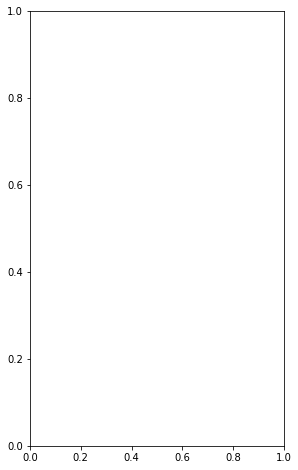

In [598]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(1, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'SVM']
for clf, lab, grd in zip([lr, svm],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X = X_test, y = np.array(y_test), clf=clf, legend=2)
    plt.title(lab)
    plt.ylim(-2, 2)
    plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlim(-2, 2)
plt.show()


## Threshold

In [186]:
for i in np.arange(0.1, 1, 0.05):
    cor_clean[f'1A_{i}'] = ((cor_clean['CYP1A2']/cor_clean['cytochrome']) > i).astype(int)
    cor_clean_w_z = cor_clean[cor_clean['CYP_l'] != 0]
    print(precision_score(cor_clean_w_z['CYP1A2_l'] > 0, cor_clean_w_z[f'1A_{i}']), i)

0.25205479452054796 0.1
0.2564935064935065 0.15000000000000002
0.27049180327868855 0.20000000000000004
0.2849740932642487 0.25000000000000006
0.2765957446808511 0.30000000000000004
0.336734693877551 0.3500000000000001
0.3194444444444444 0.40000000000000013
0.3333333333333333 0.45000000000000007
0.3333333333333333 0.5000000000000001
0.35 0.5500000000000002
0.3157894736842105 0.6000000000000002
0.2857142857142857 0.6500000000000001
0.18181818181818182 0.7000000000000002
0.2 0.7500000000000002
0.2857142857142857 0.8000000000000002
0.2857142857142857 0.8500000000000002
0.2857142857142857 0.9000000000000002
0.2857142857142857 0.9500000000000003


In [187]:
for i in np.arange(0.1, 1, 0.05):
    cor_clean[f'2C9_{i}'] = ((cor_clean['CYP2C9']/cor_clean['cytochrome']) > i).astype(int)
    cor_clean_w_z = cor_clean[cor_clean['CYP_l'] != 0]
    print(precision_score(cor_clean_w_z['CYP2C9_l'] > 0, cor_clean_w_z[f'2C9_{i}']), i)

0.2727272727272727 0.1
0.2865853658536585 0.15000000000000002
0.2978723404255319 0.20000000000000004
0.3155737704918033 0.25000000000000006
0.3251231527093596 0.30000000000000004
0.37423312883435583 0.3500000000000001
0.3652173913043478 0.40000000000000013
0.3875 0.45000000000000007
0.4117647058823529 0.5000000000000001
0.3902439024390244 0.5500000000000002
0.4 0.6000000000000002
0.375 0.6500000000000001
0.47368421052631576 0.7000000000000002
0.35714285714285715 0.7500000000000002
0.4166666666666667 0.8000000000000002
0.4166666666666667 0.8500000000000002
0.5 0.9000000000000002
0.4444444444444444 0.9500000000000003


In [202]:
for i in np.arange(0.1, 1, 0.05):
    cor_clean[f'2C8_{i:1f}'] = ((cor_clean['CYP2C8']/cor_clean['cytochrome']) > i).astype(int)
    cor_clean_w_z = cor_clean[cor_clean['CYP_l'] != 0]
    print(precision_score(cor_clean_w_z['CYP2C8_l'] > 0, cor_clean_w_z[f'2C8_{i}']), recall_score(cor_clean_w_z['CYP2C8_l'] > 0, cor_clean_w_z[f'2C8_{i}']), i)

0.1797752808988764 0.7619047619047619 0.1
0.192090395480226 0.5396825396825397 0.15000000000000002
0.2159090909090909 0.30158730158730157 0.20000000000000004
0.2549019607843137 0.20634920634920634 0.25000000000000006
0.2962962962962963 0.12698412698412698 0.30000000000000004
0.35 0.1111111111111111 0.3500000000000001
0.2857142857142857 0.06349206349206349 0.40000000000000013
0.25 0.047619047619047616 0.45000000000000007
0.125 0.015873015873015872 0.5000000000000001
0.14285714285714285 0.015873015873015872 0.5500000000000002
0.14285714285714285 0.015873015873015872 0.6000000000000002
0.25 0.015873015873015872 0.6500000000000001
0.25 0.015873015873015872 0.7000000000000002
0.25 0.015873015873015872 0.7500000000000002
0.0 0.0 0.8000000000000002
0.0 0.0 0.8500000000000002
0.0 0.0 0.9000000000000002
0.0 0.0 0.9500000000000003


In [203]:
cor_clean_w_z.columns

Index(['drug', 'CYP_l', 'CYP1A2_l', 'CYP3A4_l', 'CYP2C8_l', 'CYP2C9_l',
       'cytochrome', 'CYP1A2', 'CYP3A4', 'CYP2C8',
       ...
       '2C8_0.500000', '2C8_0.550000', '2C8_0.600000', '2C8_0.650000',
       '2C8_0.700000', '2C8_0.750000', '2C8_0.800000', '2C8_0.850000',
       '2C8_0.900000', '2C8_0.950000'],
      dtype='object', length=105)

In [125]:
cor_clean['3A_f'] = ((cor_clean['CYP3A4']/cor_clean['cytochrome']))

In [137]:
cor_clean_w_z = cor_clean[cor_clean['CYP_l'] != 0]
cor_clean_w_z.head(3)

,drug,CYP_l,CYP1A2_l,CYP3A4_l,CYP2C8_l,CYP2C9_l,cytochrome,CYP1A2,CYP3A4,CYP2C8,...,3A_0.6,3A_0.7000000000000001,3A_0.8,3A_0.9,3A_0.25,3A_0.3,3A_0.35,3A_0.39999999999999997,3A_0.44999999999999996,3A_f
3,OZANIMOD,2,0,1,0,0,51,4,22,8,...,0,0,0,0,1,1,1,1,0,0.431373
7,OSILODROSTAT,3,0,1,0,0,51,18,32,8,...,1,0,0,0,1,1,1,1,1,0.627451
8,LURBINECTEDIN,1,0,1,0,0,62,3,25,5,...,0,0,0,0,1,1,1,1,0,0.403226


In [23]:
cor_clean_w_z['CYP_l'].value_counts()

1     119
2     108
3      69
4      46
5      23
6      22
7       8
9       4
10      2
8       2
12      1
11      1
Name: CYP_l, dtype: int64

In [138]:
confusion_matrix(cor_clean_w_z['CYP3A4_l'] > 0.6, cor_clean_w_z['3A'])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [25]:
accuracy_score(cor_clean_w_z['CYP3A4_l'] > 0, cor_clean_w_z['3A'])

0.745679012345679

In [143]:
cor_clean_w_z['3a_l'] = cor_clean_w_z['CYP3A4_l']/cor_clean_w_z['CYP_l']

C:\Users\grish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Visualization

In [414]:
cor_clean.describe()

,cytochrome,CYP1A2,CYP3A4,CYP2C8,CYP2C9,count_name,CYP1A2_norm_cyt,CYP1A2_norm_name,CYP3A4_norm_cyt,CYP3A4_norm_name,CYP2C8_norm_cyt,CYP2C8_norm_name,CYP2C9_norm_cyt,CYP2C9_norm_name
count,820.000000,820.00000,820.000000,820.000000,820.000000,8.200000e+02,815.000000,819.000000,815.000000,819.000000,815.000000,819.000000,815.000000,819.000000
mean,2595.024390,534.75122,1215.540244,268.542683,707.002439,4.766772e+04,0.234285,0.026603,0.598434,0.066804,0.122012,0.014547,0.287340,0.037707
std,8286.044809,1296.61680,2644.884146,666.981932,1687.915472,1.759862e+05,0.304347,0.103146,0.570654,0.275943,0.153350,0.066255,0.412055,0.180624
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,112.750000,17.75000,60.000000,8.000000,19.000000,2.350000e+03,0.105946,0.004341,0.356801,0.013813,0.044963,0.001906,0.119896,0.004556
50%,501.000000,87.50000,267.000000,42.000000,104.000000,8.970000e+03,0.183099,0.009256,0.542553,0.028233,0.093750,0.004725,0.225000,0.011211
75%,2012.500000,409.50000,1102.500000,169.000000,540.750000,2.892500e+04,0.285714,0.020083,0.750000,0.051884,0.156964,0.010679,0.363881,0.026087
max,123000.000000,13100.00000,21500.000000,5830.000000,15600.000000,2.420000e+06,4.192308,1.904000,7.496112,5.536000,2.134615,1.384000,6.671851,3.552000


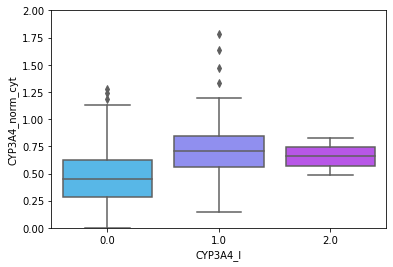

In [69]:
fig, ax = plt.subplots()
sns.boxplot(data = cor_clean_all, x = 'CYP3A4_l', y='CYP3A4_norm_cyt', ax=ax, palette='cool')
plt.ylim(0, 2)

plt.savefig('cor_b.png')

(0, 100)

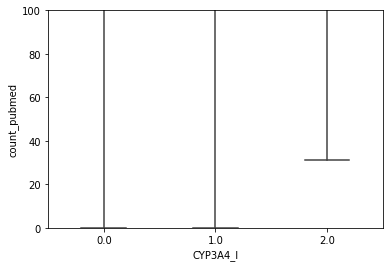

In [100]:
fig, ax = plt.subplots()
sns.boxplot(data = cor_clean_all, x = 'CYP3A4_l', y='count_pubmed', ax=ax, palette='Blues')
plt.ylim(0, 100)
#plt.savefig('cor_2_b.png')

(0, 0.2)

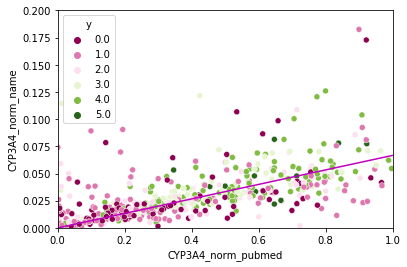

In [135]:
sns.scatterplot(data=cor_clean_all[cor_clean_all['year']>1960], x = 'CYP3A4_norm_pubmed', y = 'CYP3A4_norm_name', hue='y', palette='PiYG')
plt.xlim(0, 1)
plt.ylim(0, 0.2
        )


In [134]:
cor_clean_all['y'] = (cor_clean_all['year'] - 1960)//10

C:\Users\grish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [120]:
cor_clean_all['year']

count     815.000000
mean     1939.942331
std       283.908527
min         0.000000
25%      1968.000000
50%      1979.000000
75%      1996.000000
max      2019.000000
Name: year, dtype: float64

In [97]:
cor_clean_all.columns

Index(['drug', 'CYP_l', 'CYP1A2_l', 'CYP3A4_l', 'CYP2C8_l', 'CYP2C9_l',
       'cytochrome', 'CYP1A2', 'CYP3A4', 'CYP2C8', 'CYP2C9', 'year',
       'count_pubmed', 'count_name', 'CYP1A2_norm_cyt', 'CYP1A2_norm_name',
       'CYP1A2_norm_pubmed', 'CYP3A4_norm_cyt', 'CYP3A4_norm_name',
       'CYP3A4_norm_pubmed', 'CYP2C8_norm_cyt', 'CYP2C8_norm_name',
       'CYP2C8_norm_pubmed', 'CYP2C9_norm_cyt', 'CYP2C9_norm_name',
       'CYP2C9_norm_pubmed', 'pubmed_count_full'],
      dtype='object')

In [162]:
cor_clean_w_z.describe()

,CYP_l,CYP1A2_l,CYP3A4_l,CYP2C8_l,CYP2C9_l,cytochrome,CYP1A2,CYP3A4,CYP2C8,CYP2C9,...,1A_0.5000000000000001,1A_0.5500000000000002,1A_0.6000000000000002,1A_0.6500000000000001,1A_0.7000000000000002,1A_0.7500000000000002,1A_0.8000000000000002,1A_0.8500000000000002,1A_0.9000000000000002,1A_0.9500000000000003
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,...,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,2.775309,0.239506,0.708642,0.155556,0.264198,2331.261728,621.271605,1413.377778,327.540741,838.024691,...,0.088889,0.049383,0.046914,0.034568,0.027160,0.024691,0.017284,0.017284,0.017284,0.017284
std,1.903978,0.433064,0.465704,0.362882,0.441450,4318.072761,1189.322815,2543.298376,664.107274,1666.868331,...,0.284935,0.216934,0.211715,0.182909,0.162752,0.155375,0.130489,0.130489,0.130489,0.130489
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,163.000000,41.000000,117.000000,22.000000,45.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,0.000000,0.000000,642.000000,145.000000,406.000000,76.000000,159.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,0.000000,1.000000,0.000000,1.000000,2290.000000,573.000000,1520.000000,296.000000,857.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,2.000000,2.000000,1.000000,1.000000,36400.000000,9170.000000,17900.000000,5830.000000,15000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [201]:
cor_clean_w_z.columns

Index(['drug', 'CYP_l', 'CYP1A2_l', 'CYP3A4_l', 'CYP2C8_l', 'CYP2C9_l',
       'cytochrome', 'CYP1A2', 'CYP3A4', 'CYP2C8',
       ...
       '2C8_0.500000', '2C8_0.550000', '2C8_0.600000', '2C8_0.650000',
       '2C8_0.700000', '2C8_0.750000', '2C8_0.800000', '2C8_0.850000',
       '2C8_0.900000', '2C8_0.950000'],
      dtype='object', length=105)

In [196]:
summury = cor_clean_w_z[['drug', 'CYP_l', 'CYP1A2_l', 'CYP3A4_l', 
                         'CYP2C8_l', 'CYP2C9_l', '3A_0.1', '1A_0.1',
                        '2C9_0.1', '2C8_0.1']]
#summury = summury.rename({'1A_0.30000000000000004': '1A_0.3', '2C9_0.9000000000000002' : '2C9_0.9', 
                          #'2C8_0.30000000000000004':'2C8_0.3'}, axis =1 )
for i in ['CYP1A2_l', 'CYP3A4_l', 
                         'CYP2C8_l', 'CYP2C9_l']:
    summury[i] = summury[i].apply(lambda x: int(x>0)) 

C:\Users\grish\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


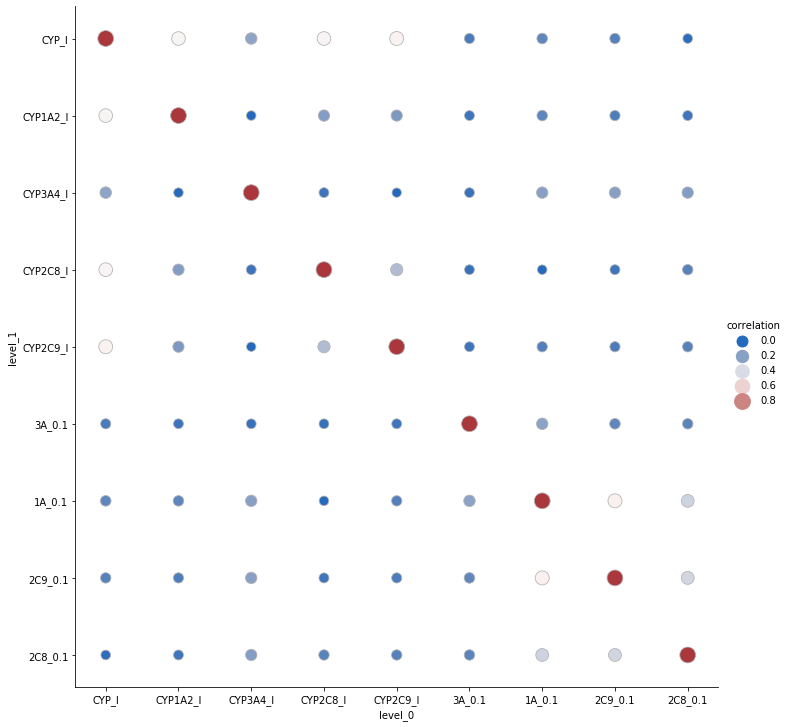

In [197]:
corr_mat = summury.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(0, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

(1900, 2030)

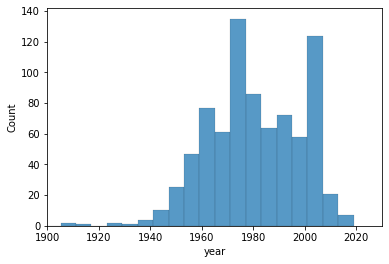

In [78]:
sns.histplot(x = cor_clean_all['year'])
plt.xlim(1900, 2030)

In [158]:
cor_clean.drop('3A', axis = 1).to_excel('drug_yes.xlsx')

In [470]:
lr = LogisticRegression(class_weight='balanced', random_state=2021, solver='saga',
                       max_iter=1000, C = i)
#svm = SVC(kernel='linear')

lr.fit(X_train, y_train)
#svm.fit(X_train, y_train)

print(accuracy_score(lr.predict(X_test), y_test))
#print(svm.coef_)

ValueError: Penalty term must be positive; got (C='CYP2C9_l')

C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elas

C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasti

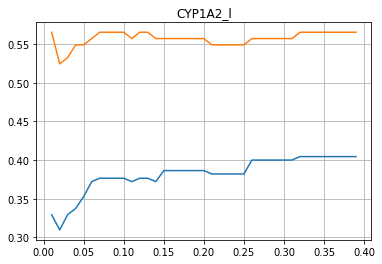

C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elas

C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not

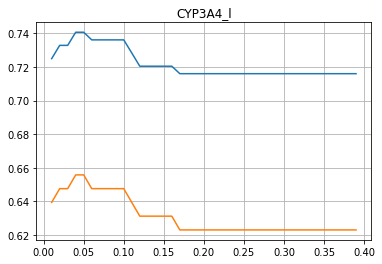

C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elas

C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasti

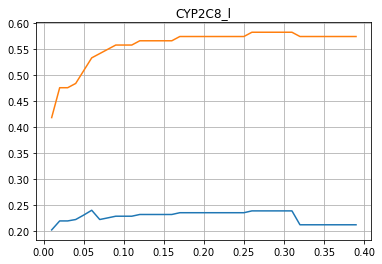

C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elas

C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\grish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasti

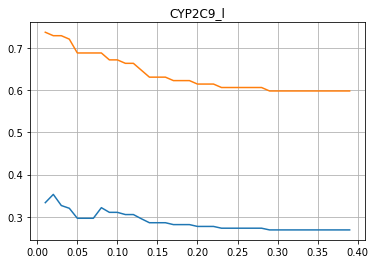

In [518]:
max_f1 =[]
max_acc = []
best_coef = []
C_best = []
for cyp in ['CYP1A2_l', 'CYP3A4_l', 'CYP2C8_l', 'CYP2C9_l']:
    X = cor_clean[['CYP1A2_norm_cyt',
               'CYP1A2_norm_name',
               'CYP3A4_norm_cyt',
               'CYP3A4_norm_name',
               'CYP2C8_norm_cyt',
               'CYP2C8_norm_name',
               'CYP2C9_norm_cyt',
               'CYP2C9_norm_name'
                  ]]
    y = (cor_clean[cyp] > 0).astype(int).replace(0, -1)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test  = train_test_split(X.fillna(0), y, \
                                                         test_size=0.3,\
                                                         shuffle=True,
                                                         random_state=2021)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    f1 =[]
    acc=[]
    coef=[]
    C = []
    for i in np.arange(0.01, 0.4, 0.01):
        lr = LogisticRegression(class_weight='balanced',
            random_state=2021,
                                        #penalty='elasticnet',
                                        l1_ratio=0.1,
                                        solver='saga',
                                       max_iter=100, C = i)

        lr.fit(X_train, y_train)
        f1.append(f1_score(y_test, lr.predict(X_test)))
        acc.append(accuracy_score(y_test, lr.predict(X_test)))
        coef.append(lr.coef_)
        C.append(i)
    plt.plot(np.arange(0.01, 0.4, 0.01), f1, np.arange(0.01, 0.4, 0.01), acc)
    max_acc.append(round(max(acc), 3))
    max_f1.append(round(f1[acc.index(max(acc))], 3))
    best_coef.append(coef[acc.index(max(acc))])
    C_best.append(C[acc.index(max(acc))])
    plt.title(f'{cyp}')
    plt.grid()
    plt.show()
    

1. Кодить:
код ревью
скрипт для мол файла (возможно ООП)
рисование графиков

2. Литобзор:
С помощью чего устанавливается связь между цитохромом и драгом
